## Tutorial on custom graph sampling

An example on how to generate your own custom dataset if you are interested in it. 

To keep it simple, we use the geographic location of the graph node here. 

However any other graph property can be accessed in the same way. 

In [2]:
import pickle
from tools.display_tools import plot_current_state_of_graph
from tools.graph_sampling_tools import get_all_subgraphs
import networkx as nx
import os

In [3]:
# Lets select the main graph
east_G = pickle.load(open("product/rivers_east_germany.p", "rb"))

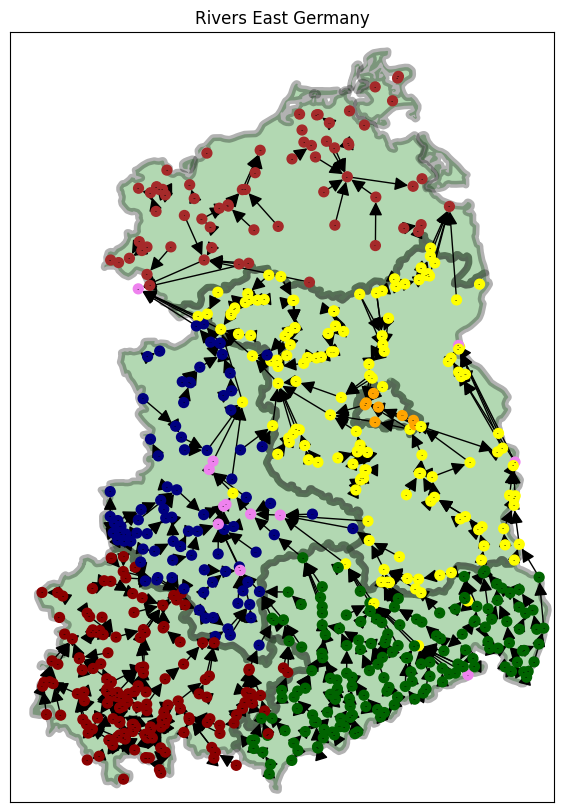

In [4]:
plot_current_state_of_graph(east_G)

In [5]:
# You can simply use graph routines from networkx and meta data of the graph to create your own custom dataset. 

# Here are the available graph features (explanation in the README)
east_G.nodes[12],east_G.get_edge_data(12,166)

({'p': (53.018323345727865, 11.587763981094762),
  'c': 'Navy',
  'origin': 'SA',
  'H': 14.49,
  'R': 'Aland',
  'D': 3.6,
  'QH': 0,
  'QD': 0,
  'QX': 0,
  'QY': 0,
  'QR': '0'},
 {'origin': 7,
  'h_distance': 8.832,
  'geo_distance': 0.6880223001037246,
  'quality_h': 0,
  'quality_geo': 1})

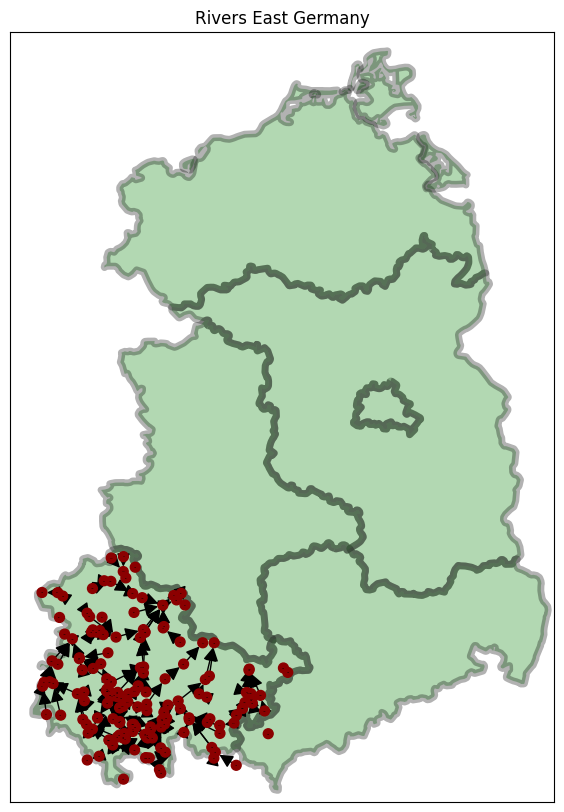

In [6]:
# Now we could filter the subgraphs to get only the subgraphs from e.g. Thuringia
T_G = nx.subgraph(east_G,[x for x in east_G.nodes if east_G.nodes[x]["origin"] == "T"])
plot_current_state_of_graph(T_G)

In [7]:
# Now we can sample each 2 variable subraph (This gives a simple list of the corresponding nodes.)
sub_Gs = get_all_subgraphs(T_G, 2)
len(sub_Gs)

159

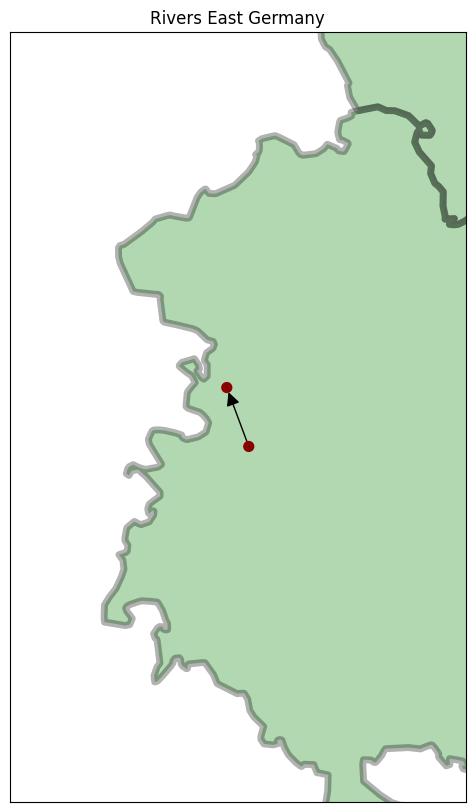

In [10]:
# We can visualize a single subgraph of this network:
plot_current_state_of_graph(nx.subgraph(T_G, sub_Gs[12]), autozoom=0.7)

In [11]:
# For saving we recommend to export all subgraphes to have all meta information available for each sample when loading. 
# You can also directly use any script we provide when confirming to this format. 
if not os.path.exists("datasets/custom/"):
    os.mkdir("datasets/custom/")
pickle.dump([nx.subgraph(T_G, x).copy() for x in sub_Gs],open("datasets/custom/east.p", "wb"),)